# Student Performance Analysis & Prediction

## Importing All Dependencies & Dataset

In [2]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scipy.stats as stats
#from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("All dependencies are imported.")

All dependencies are imported.


In [4]:
per=pd.read_csv('/content/StudentsPerformance.csv')
print("Student performance dataset:")
display(per)

Student performance dataset:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Data Analysis & Preprocessing

In [5]:
print("Dataset information:")
display(per.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

In [6]:
print("Dataset description:")
display(per.describe())

Dataset description:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
print("Null counts:")
display(per.isnull().sum())

Null counts:


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

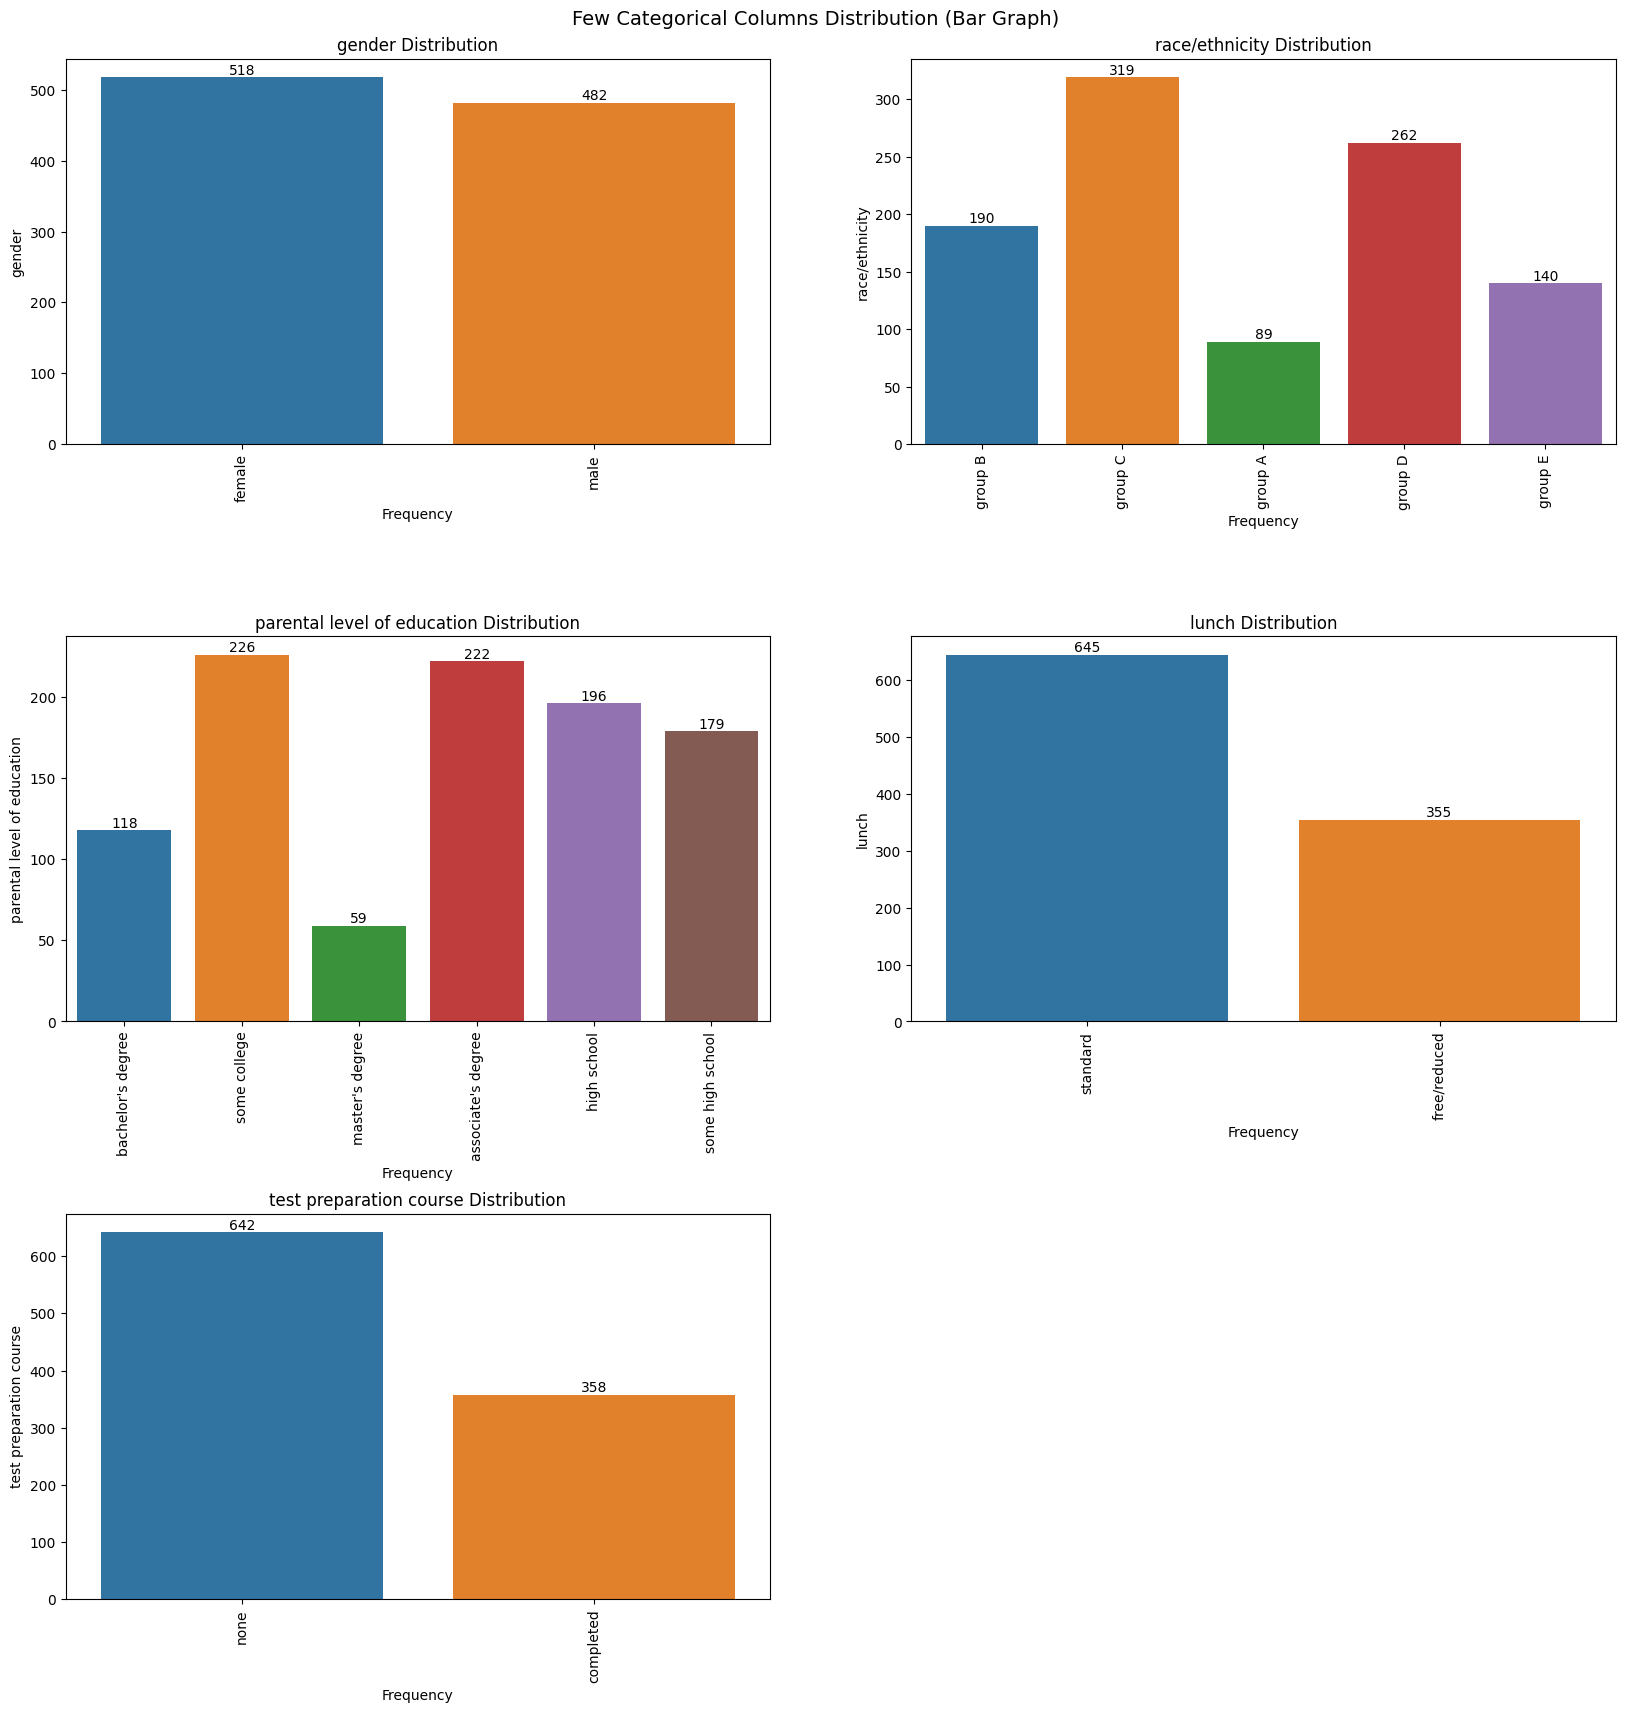

In [9]:
cat_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
for i, col in enumerate(cat_cols):
    r = i // 2
    c = i % 2
    sns.countplot(x=col, data=per, ax=axes[r, c])
    for container in axes[r, c].containers:
        axes[r, c].bar_label(container, label_type="edge")
    axes[r, c].set_ylabel(f"{col}")
    axes[r, c].set_xlabel("Frequency")
    axes[r, c].set_xticklabels(axes[r,c].get_xticklabels(),rotation="vertical")
    axes[r, c].set_title(f"{cat_cols[i]} Distribution")
if len(cat_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])
plt.subplots_adjust(hspace=0.5)
fig.text(0.5,0.9,"Few Categorical Columns Distribution (Bar Graph)", va="center", ha="center", fontsize=14)
plt.show()

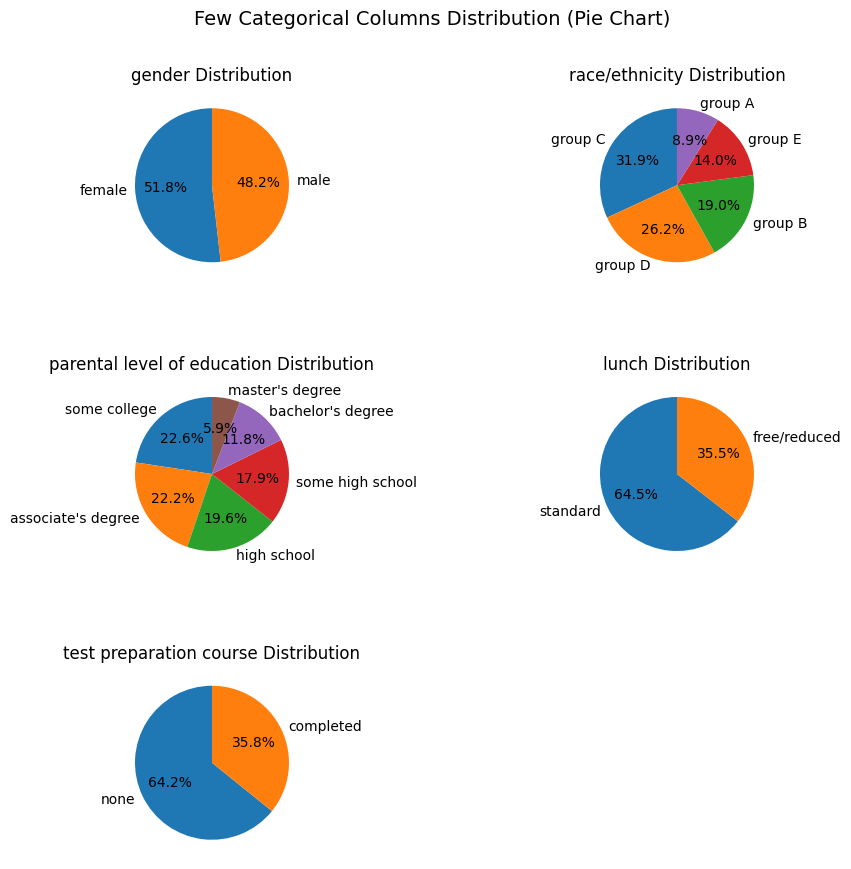

In [10]:
cat_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, col in enumerate(cat_cols):
    r = i // 2
    c = i % 2
    counts = per[col].value_counts()
    axes[r, c].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[r, c].set_title(f"{col} Distribution")
if len(cat_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])
plt.subplots_adjust(hspace=0.5, wspace=0.5)
fig.text(0.5,0.95,"Few Categorical Columns Distribution (Pie Chart)",va="center", ha="center", fontsize=14)
plt.show()

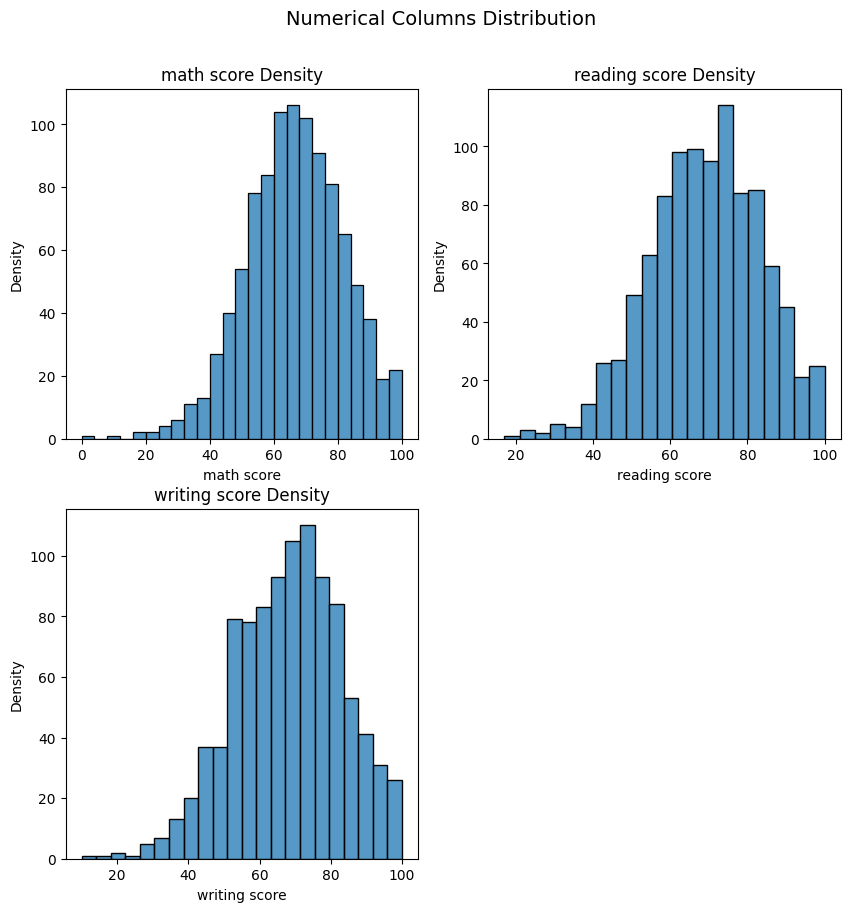

In [11]:
num_cols=["math score","reading score","writing score"]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(num_cols):
    r,c=i//2,i%2
    sns.histplot(x=col, data=per,ax=axes[r,c])
    axes[i//2,i%2].set_ylabel("Density")
    axes[i//2,i%2].set_title(f"{col} Density")
if len(num_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])
fig.text(0.5,0.95,"Numerical Columns Distribution",va="center", ha="center", fontsize=14)
plt.show()

In [12]:
print("Checking the confidence interval of the course scores before creating the new columns for the target variable:")
course_cols = ["math score", "reading score", "writing score"]
np.random.seed(10)
sample_size = 1000

for col in course_cols:
    print(f"\n{col}:")
    sample = np.random.choice(a=per[col], size=sample_size)  # Corrected typo in np.random.choice
    sample_mean = sample.mean()
    z_critical = stats.norm.ppf(q=0.95)
    print("Z critical value:")
    print(z_critical)
    pop_stdev = per[col].std()
    print("Population standard deviation:")
    print(pop_stdev)
    margin_of_error = z_critical * (pop_stdev / np.sqrt(sample_size))  # Corrected typo in np.sqrt
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    print("Confidence Interval:")
    print(confidence_interval)
    print(f"True Mean of {col}:")
    print(per[col].mean())

Checking the confidence interval of the course scores before creating the new columns for the target variable:

math score:
Z critical value:
1.6448536269514722
Population standard deviation:
15.16308009600945
Confidence Interval:
(64.82729483328328, 66.40470516671672)
True Mean of math score:
66.089

reading score:
Z critical value:
1.6448536269514722
Population standard deviation:
14.600191937252216
Confidence Interval:
(68.80157337011646, 70.32042662988356)
True Mean of reading score:
69.169

writing score:
Z critical value:
1.6448536269514722
Population standard deviation:
15.19565701086965
Confidence Interval:
(67.74860035030862, 69.32939964969138)
True Mean of writing score:
68.054


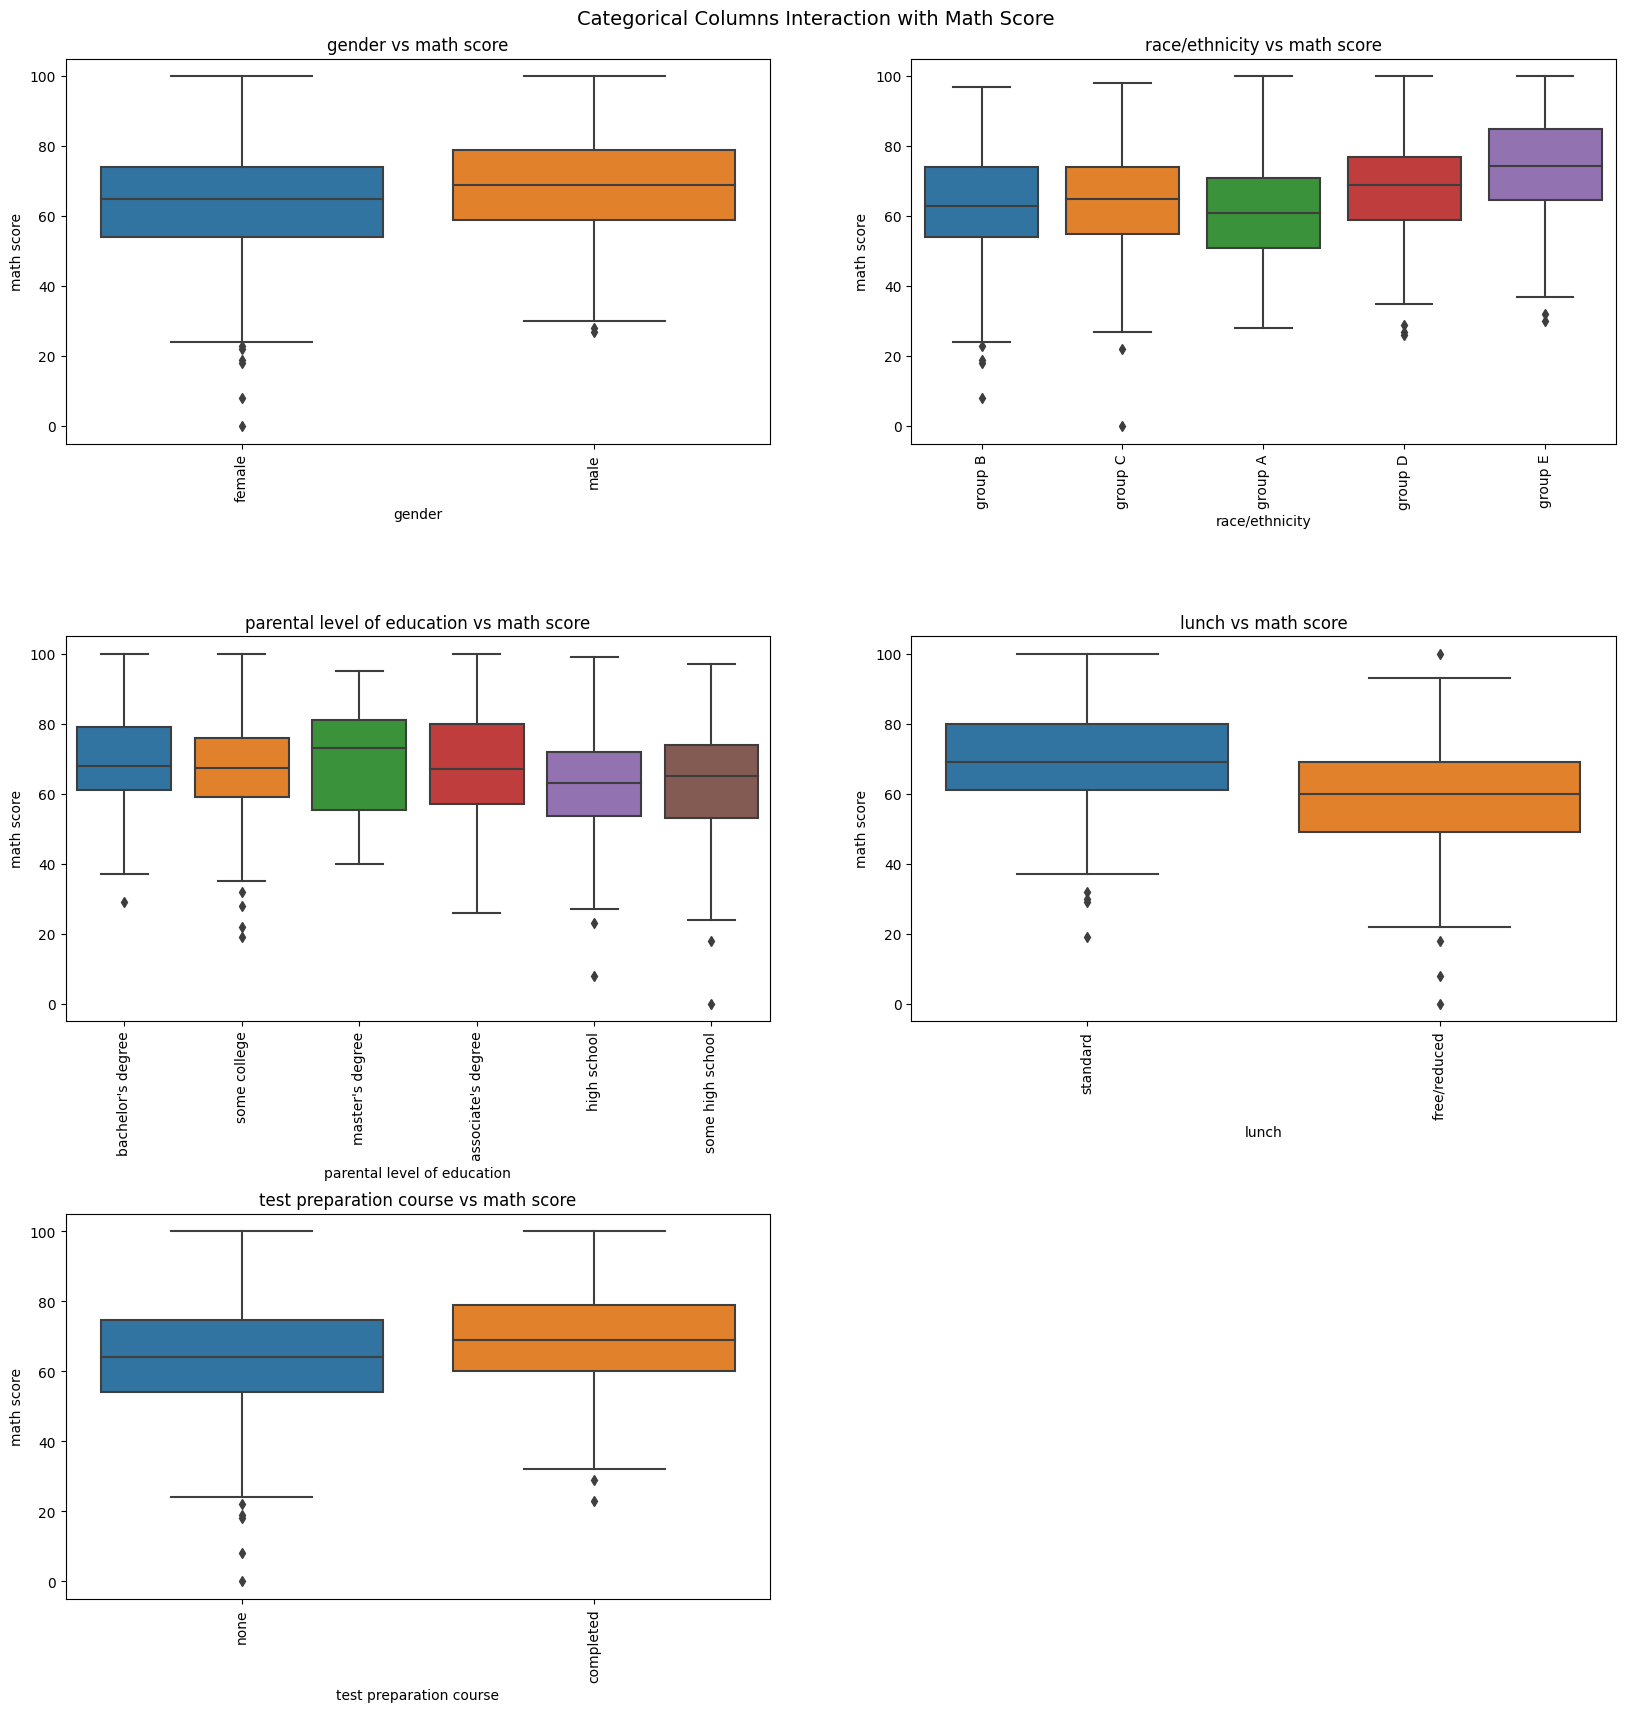

In [13]:
cat_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
for i, col in enumerate(cat_cols):
    r = i // 2
    c = i % 2
    sns.boxplot(x=col,y="math score", data=per, ax=axes[r, c])
    for container in axes[r, c].containers:
        axes[r, c].bar_label(container, label_type="edge")
    axes[r, c].set_xlabel(f"{col}")
    axes[r, c].set_ylabel("math score")
    axes[r, c].set_xticklabels(axes[r,c].get_xticklabels(),rotation="vertical")
    axes[r, c].set_title(f"{cat_cols[i]} vs math score")
if len(cat_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])
plt.subplots_adjust(hspace=0.5)
fig.text(0.5,0.9,"Categorical Columns Interaction with Math Score", va="center", ha="center", fontsize=14)
plt.show()

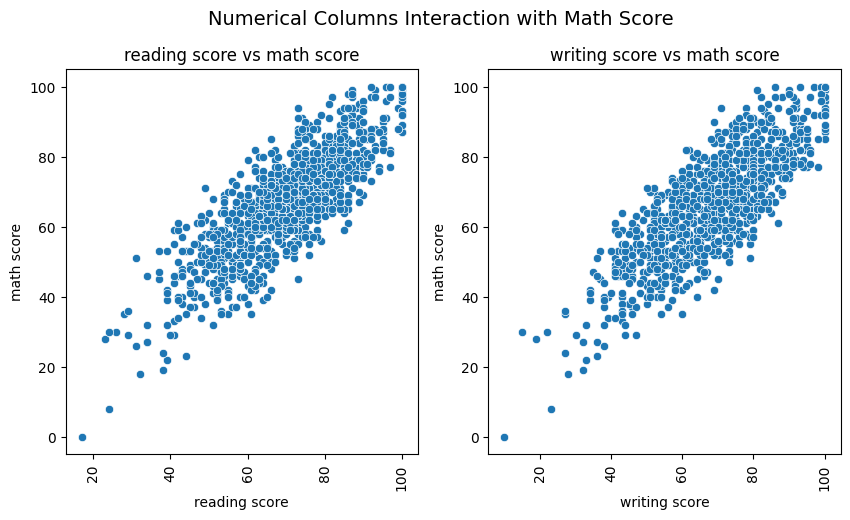

In [14]:
num_cols = ["reading score", "writing score"]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for i, col in enumerate(num_cols):
    sns.scatterplot(x=col, y="math score", data=per, ax=axes[i])
    axes[i].set_xlabel(f"{col}")
    axes[i].set_ylabel("math score")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation="vertical")
    axes[i].set_title(f"{col} vs math score")
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Numerical Columns Interaction with Math Score", va="center", ha="center", fontsize=14)
plt.show()

In [15]:
label_encoders={}
for col in cat_cols:
    le=LabelEncoder()
    per[col]=le.fit_transform(per[col])
    label_encoders[col]=le
print("Label Encoding the category columns:")
display(per.head())
print("\nEncoding details:")
for column, encoder in label_encoders.items():
    print(f"{column} Label Encoder Classes: {encoder.classes_}")

Label Encoding the category columns:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75



Encoding details:
gender Label Encoder Classes: ['female' 'male']
race/ethnicity Label Encoder Classes: ['group A' 'group B' 'group C' 'group D' 'group E']
parental level of education Label Encoder Classes: ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
lunch Label Encoder Classes: ['free/reduced' 'standard']
test preparation course Label Encoder Classes: ['completed' 'none']


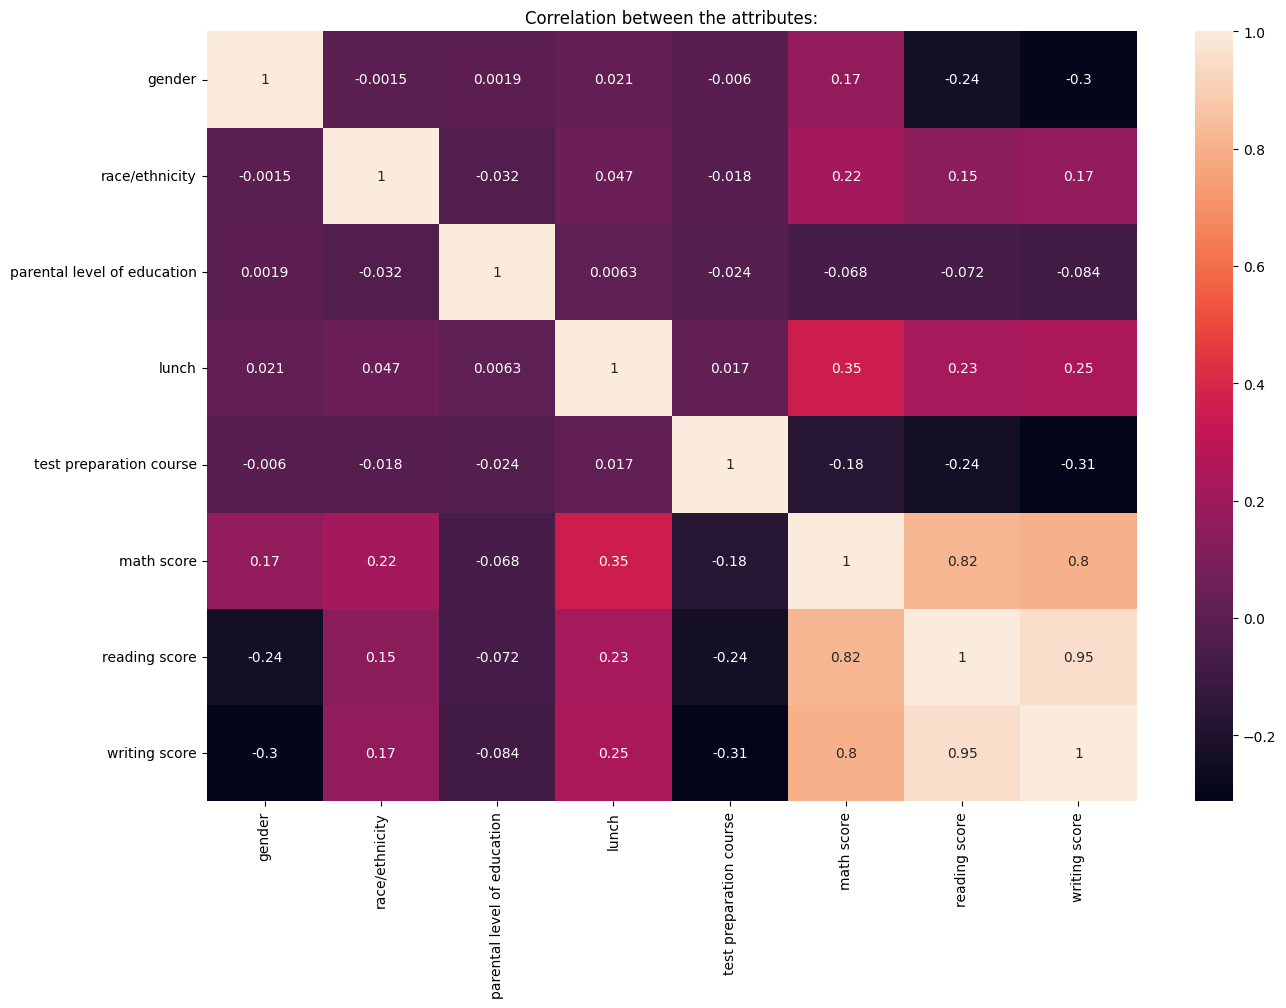

In [16]:
plt.figure(figsize=(15,10))
plt.title('Correlation between the attributes:')
sns.heatmap(per.corr(),annot=True)
plt.show()

In [17]:
y=per["math score"]
x=per.drop("math score", axis=1)
print("Input variables:")
display(x)
print()
print("Output:")
display(y)

Input variables:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,1,1,1,1,72,74
1,0,2,4,1,0,90,88
2,0,1,3,1,1,95,93
3,1,0,0,0,1,57,44
4,1,2,4,1,1,78,75
...,...,...,...,...,...,...,...
995,0,4,3,1,0,99,95
996,1,2,2,0,1,55,55
997,0,2,2,0,0,71,65
998,0,3,4,1,0,78,77



Output:


0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [18]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print("Shapes after train-test split:")
print(f"Training input: {x_train.shape}")
print(f"Testing input: {x_test.shape}")
print(f"Testing output: {y_train.shape}")
print(f"Testing output: {y_test.shape}")

Shapes after train-test split:
Training input: (750, 7)
Testing input: (250, 7)
Testing output: (750,)
Testing output: (250,)


In [19]:
models=[LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor(),
        RandomForestRegressor(), ExtraTreesRegressor()]
r2_scores=[]
for model in models:
    print("Model used:")
    display(model)
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    r2=r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}")
    r2_scores.append(r2)
    print("\n")
max_r2=max(r2_scores)
print(f"Best R2 Score Recorded: {max_r2}.")
max_idx=r2_scores.index(max_r2)
best_model=models[max_idx]
print(f"Best Model Performance: {best_model}.")

Model used:


LinearRegression()

R2 Score: 0.8795296105895842


Model used:


Lasso()

R2 Score: 0.8273491477301527


Model used:


Ridge()

R2 Score: 0.8794314209493799


Model used:


KNeighborsRegressor()

R2 Score: 0.6685561540381053


Model used:


SVR()

R2 Score: 0.6256742772886894


Model used:


DecisionTreeRegressor()

R2 Score: 0.7462033088064818


Model used:


RandomForestRegressor()

R2 Score: 0.8505740126191846


Model used:


ExtraTreesRegressor()

R2 Score: 0.8281188211236368


Best R2 Score Recorded: 0.8795296105895842.
Best Model Performance: LinearRegression().


In [20]:
print(f"Model Evaluation of {best_model}:")
best_model.fit(x_train,y_train)
y_pred=best_model.predict(x_test)
print("\nR2 Score:")
print(r2_score(y_test, y_pred))
print("\nMean Absolute Error:")
print(mean_absolute_error(y_test, y_pred))
print("\nMean Squared Error:")
print(mean_squared_error(y_test, y_pred))

Model Evaluation of LinearRegression():

R2 Score:
0.8795296105895842

Mean Absolute Error:
4.315631383102996

Mean Squared Error:
29.638570461309747


## Predictive Modelling

In [21]:
label_encoders

{'gender': LabelEncoder(),
 'race/ethnicity': LabelEncoder(),
 'parental level of education': LabelEncoder(),
 'lunch': LabelEncoder(),
 'test preparation course': LabelEncoder()}

In [23]:
print("Enter the details for the prediction:")
encoded_values = {}
gender = "male"
race = "group C"
parental_level_of_education = "some college"
lunch = "standard"
test_preparation_course = "none"
reading_score = 77
writing_score = 71
print([gender,race,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score])
cols_to_encode = {
    "gender": gender,
    "race/ethnicity": race,
    "parental level of education": parental_level_of_education,
    "lunch": lunch,
    "test preparation course": test_preparation_course}

for col, val in cols_to_encode.items():
    le = label_encoders[col]
    encoded_values[col] = le.transform([val])

print("Encoded values:")
display(encoded_values)
print()
new_data = pd.DataFrame(encoded_values)
new_data['reading score'] = float(reading_score)
new_data['writing score'] = float(writing_score)
print("New row for predictions:")
display(new_data)
print()
pred_math_score = best_model.predict(new_data)
pred_math_score = round(pred_math_score[0],2)
print(f"Predicted Math Score: {pred_math_score}")
new_data["math score"]= pred_math_score
print("\nRow with predicted math score:")
display(new_data)

Enter the details for the prediction:
['male', 'group C', 'some college', 'standard', 'none', 77, 71]
Encoded values:


{'gender': array([1]),
 'race/ethnicity': array([2]),
 'parental level of education': array([4]),
 'lunch': array([1]),
 'test preparation course': array([1])}


New row for predictions:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,1,2,4,1,1,77.0,71.0



Predicted Math Score: 79.5

Row with predicted math score:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,1,2,4,1,1,77.0,71.0,79.5
